# Relax Challenge

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven-day  period ,  identify  which  factors  predict  future  user
adoption.

We  suggest  spending  1-2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  --  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [175]:
# import libraries

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dtime
import seaborn as sns

In [176]:
# read in data

df_engagement = pd.read_csv('takehome_user_engagement.csv')
df_users = pd.read_csv('takehome_users.csv',  encoding='ISO-8859–1')

In [177]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [178]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


No null values detected in this dataframe.

In [179]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [224]:
df_users = df_users.set_index('object_id')

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,unix_creation_time,account_age_days,invited
object_id,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.398157e+09,0.000000,invited_by_non_adoptee
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.384509e+09,135.750000,invited_by_non_adoptee
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.363753e+09,0.000000,invited_by_non_adoptee
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.369142e+09,0.791667,invited_by_non_adoptee
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.358439e+09,4.750000,invited_by_non_adoptee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,1.378466e+09,0.000000,invited_by_non_adoptee
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,1.357864e+09,4.750000,no_invite
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,1.398621e+09,0.000000,invited_by_adoptee


In [221]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted                     12000 non-null  float64       
 11  unix_creation_time          12000 non-null  float64   

Null values are present in `last_session_creation_time` and `invited_by_user_id`. The null values for `invited_by_user_id` likely indicate users who did not join via invitation.

In [181]:
len(df_engagement.user_id.unique())

8823

The number of unique `user_id` values in the engagement dataframe is identical to the number of users who have a value for `last_session_creation_time`. This suggests that the null values for `last_session_creation_time` are a result of those users never actually engaging with the service.

In [183]:
# create "adopted" target variable

seven_days = datetime.timedelta(days=7)
adopted_array = np.zeros(len(df_users))

for user_id in (list(df_engagement['user_id'].unique())):
    
    adopted_user = 0
    temp = df_engagement[df_engagement['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == 1:
            continue
        # 'time_stamp' is the second item in the tuple
        this_time = row[1]
        # If there are at least three timestamps within 7 days of this timestamp for this user, mark as adopted
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_array[user_id - 1] = 1
            
df_users['adopted'] = adopted_array

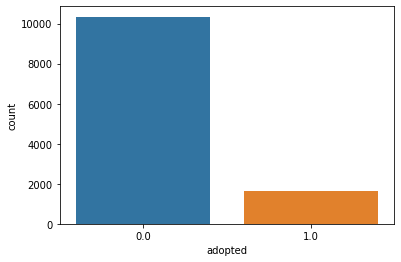

Users retained: 13.80%


In [80]:
# Check how many users were retained
sns.countplot('adopted', data=df_users)
plt.show()

value_counts = df_users['adopted'].value_counts()
print(f'Users retained: {value_counts[1] / value_counts.sum() * 100:0.2f}%')

The data is strongly skewed toward users not becoming adopted.

Using the provided timestamp and time series data, it may be valuable to note how long an account has been active.

In [182]:
# convert date strings to datetime objects

df_engagement = df_engagement.sort_values('user_id')
df_engagement.loc[:, 'time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

df_users.loc[:,'creation_time'] = pd.to_datetime(df_users['creation_time'])

In [218]:
df_users.loc[:,'unix_creation_time'] = [dtime.timestamp(time) for time in df_users['creation_time']]
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,unix_creation_time,account_age_days,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.398157e+09,0.000000,invited_by_non_adoptee
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.384509e+09,135.750000,invited_by_non_adoptee
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.363753e+09,0.000000,invited_by_non_adoptee
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.369142e+09,0.791667,invited_by_non_adoptee
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.358439e+09,4.750000,invited_by_non_adoptee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,1.378466e+09,0.000000,invited_by_non_adoptee
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,1.357864e+09,4.750000,no_invite
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,1.398621e+09,0.000000,invited_by_adoptee
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0,1.338483e+09,1.791667,no_invite


In [219]:
df_users.loc[:,'last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['unix_creation_time'])

In [220]:
account_age_seconds =  df_users['last_session_creation_time'] - df_users['unix_creation_time']
account_age_seconds[account_age_seconds < 0] = 0
df_users.loc[:,'account_age_days'] = account_age_seconds / (3600 * 24)
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,unix_creation_time,account_age_days,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.398157e+09,0.000000,invited_by_non_adoptee
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.384509e+09,135.750000,invited_by_non_adoptee
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.363753e+09,0.000000,invited_by_non_adoptee
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.369142e+09,0.791667,invited_by_non_adoptee
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.358439e+09,4.750000,invited_by_non_adoptee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,1.378466e+09,0.000000,invited_by_non_adoptee
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0,1.357864e+09,4.750000,no_invite
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,1.398621e+09,0.000000,invited_by_adoptee
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0,1.338483e+09,1.791667,no_invite


I also engineer a categorical feature to determine whether a user was invited and whether they were invited by an adopted user.

In [250]:
df_users.loc[:,'invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)

invited = ['no_invite' if id == 0 
           else 'yes_by_adoptee' if df_users.loc[id, 'adopted'] == 1 
           else 'yes_by_non_adoptee'
           for id in df_users['invited_by_user_id']]

df_users.loc[:,'invited'] = invited

I drop `name` and `email` since these features merely serve as alternate means of identification. I also drop `last_session_creation_time` and `creation_time` since I am now using `account_age_days` to capture information about the user account's lifespan. Next, `org_id` is a categorical variable with so so many states that it would just be noise in a model; I also do not expect `org_id` to be a particularly useful feature to us in general. Finally, the values of `invited_by_user_id` are dropped in favor of `invited`.

In [258]:
X = df_users.drop(['object_id', 'name', 'email', 
                   'creation_time', 'unix_creation_time', 
                   'last_session_creation_time', 'invited_by_user_id',
                   'org_id','adopted'], axis=1)
y = df_users['adopted']

In [259]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   account_age_days            12000 non-null  float64
 4   invited                     12000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 468.9+ KB


In [15]:
# import libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_confusion_matrix

For the sake of showing my entire thought process of this project, I'll show the work I put into my first attempt at a model.

In [260]:
X = pd.get_dummies(X, columns=['creation_source', 'invited'], drop_first=True)

In [261]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75)

In [263]:
# Random Forest
def random_forest_grid_search_cv():
    clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
    rf_param_grid = {'n_estimators':[25,50,100,200,300],
                     'max_depth':[2,4,6],
                     'min_samples_split':[2,4,6],
                     'min_samples_leaf':[1,2,3],
                     'max_features':['sqrt','log2']}

    search = GridSearchCV(clf, param_grid=rf_param_grid, scoring='roc_auc', n_jobs=-1)
    search.fit(X_train, y_train)

    print(search.best_score_)
    print(search.best_params_)
    
    return search
    
search = random_forest_grid_search_cv()

0.9929181494408571
{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2586
         1.0       0.75      0.97      0.85       414

    accuracy                           0.95      3000
   macro avg       0.87      0.96      0.91      3000
weighted avg       0.96      0.95      0.95      3000



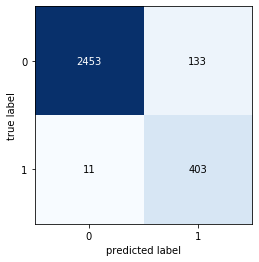

In [264]:
# plot metrics
def show_classification_report_and_confusion_matrix(search):
    y_pred = search.predict(X_test)

    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))
    plt.show()
    
show_classification_report_and_confusion_matrix(search)

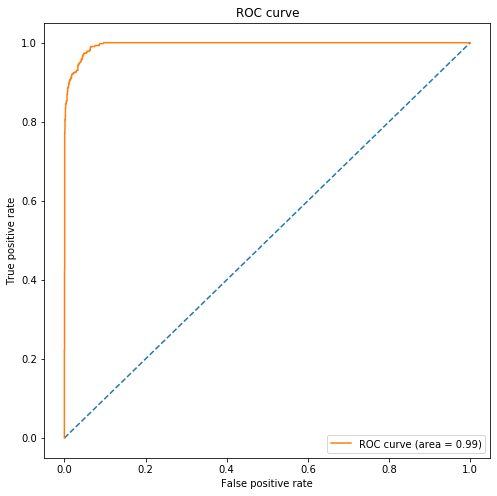

In [265]:
def plot_roc_curve(search):
    y_pred_prob = search.predict_proba(X_test)[:, 1]
    fp_rate, tp_rate, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fp_rate, tp_rate)
    plt.figure(figsize=(8,8))

    plt.plot([0,1], [0,1], '--')
    plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc_curve(search)

The roc_auc score is over .99, which I believe indicates one of the features is too strongly predictive of the target variable. At this point, I strongly suspect that the culprit is my measurement of account age.

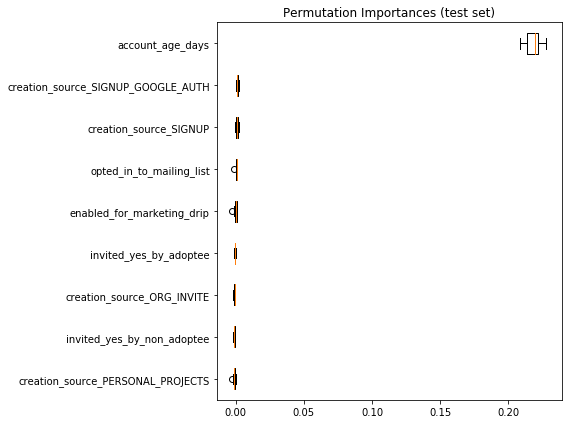

In [269]:
def plot_permutation_importances(clf):
    result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                    random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()

    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()

plot_permutation_importances(search.best_estimator_)

As I suspected, the time between account creation and the most recent session creation is far more predictive than any of the other features. However, this actually tells us almost nothing about the business problem; it follows that adopted users are more likely to become long-term users, but this is exactly the state we're trying to learn about! So, I rebuild the model after dropping the account age feature.

0.5614723168956435
{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.88      0.49      0.63      2586
         1.0       0.15      0.57      0.24       414

    accuracy                           0.51      3000
   macro avg       0.52      0.53      0.44      3000
weighted avg       0.78      0.51      0.58      3000



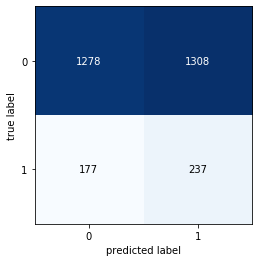

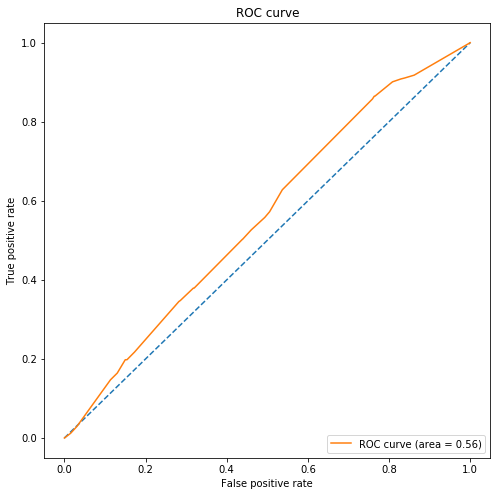

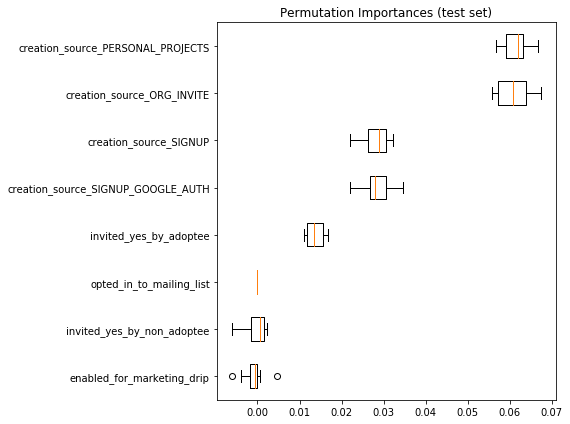

In [271]:
X = X.drop('account_age_days', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75)

search = random_forest_grid_search_cv()

show_classification_report_and_confusion_matrix(search)
plot_roc_curve(search)
plot_permutation_importances(search.best_estimator_)

Unfortunately, none of the remaining features are especially predictive of future adoption. The "personal projects" and "org invite" creation sources are a bit more important that the other features, but seeing how the second ROC curve is barely better than guessing, it's unclear how strongly these features should be considered. Still, the best lead I have at this point is that the "personal projects" and "org invite" featureds may be the best creation sources to target.